In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('metaverse_transactions_dataset.csv')

In [3]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [4]:
df.shape

(78600, 14)

In [5]:
df.columns

Index(['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
       'amount', 'transaction_type', 'location_region', 'ip_prefix',
       'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [7]:
df=df.drop(['sending_address', 'receiving_address','ip_prefix'],axis=1)
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk


In [8]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk


In [9]:
df['timestamp'].sort_values()

62869   2022-01-01 00:00:45
41882   2022-01-01 00:12:24
31457   2022-01-01 00:14:54
18364   2022-01-01 00:27:12
3359    2022-01-01 00:36:27
                ...        
28762   2022-12-31 23:25:21
34614   2022-12-31 23:36:26
40329   2022-12-31 23:41:28
62686   2022-12-31 23:46:47
52891   2022-12-31 23:47:40
Name: timestamp, Length: 78600, dtype: datetime64[ns]

In [10]:
df=df.sort_values('timestamp')
df=df.reset_index()
df=df.drop('index',axis=1)
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,592.024530,transfer,South America,6,84,high_value,veteran,49.6125,low_risk
1,2022-01-01 00:12:24,0,755.500717,transfer,North America,3,70,focused,established,25.3125,low_risk
2,2022-01-01 00:14:54,0,247.716361,transfer,Asia,5,54,focused,established,20.2500,low_risk
3,2022-01-01 00:27:12,0,422.789709,purchase,North America,4,62,focused,established,35.4375,low_risk
4,2022-01-01 00:36:27,0,353.949174,sale,South America,7,94,high_value,veteran,70.8750,moderate_risk


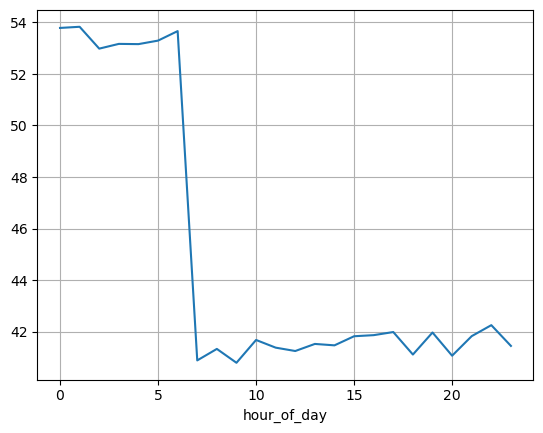

In [11]:
df.groupby('hour_of_day')['risk_score'].mean().plot(kind='line')
plt.grid()
plt.show()

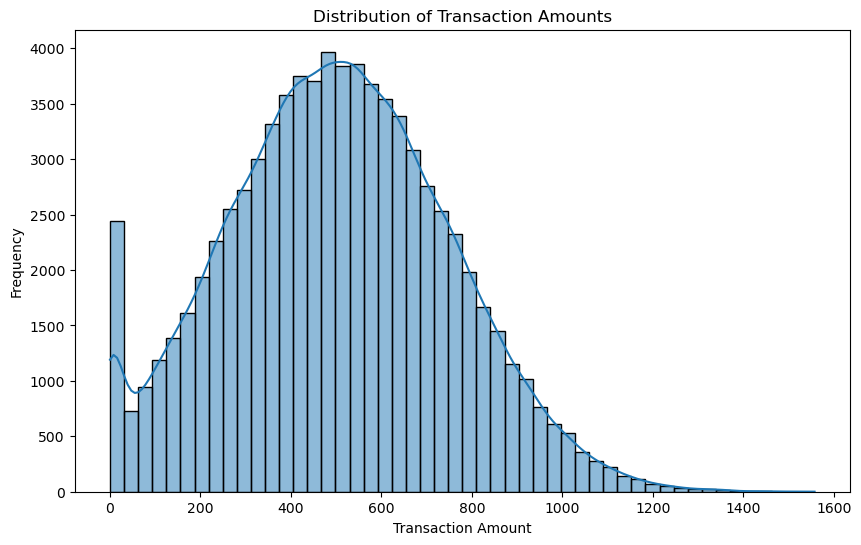

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [80]:
# Drop unnecessary columns for correlation analysis
# Columns like "timestamp", "sending_address", and "receiving_address" are dropped as they don't provide numerical correlations.


# Perform one-hot encoding on the categorical features
data_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
correlation_matrix



,timestamp,hour_of_day,amount,login_frequency,session_duration,risk_score,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran,anomaly_low_risk,anomaly_moderate_risk
timestamp,1.000000,0.006175,0.001495,0.000659,0.002738,-0.003806,0.004288,-0.002223,-0.002274,0.000155,0.000258,0.005096,-0.004968,-0.003314,0.000378,0.001270,0.001270,0.000378,0.005477,-0.003612
hour_of_day,0.006175,1.000000,0.000484,0.004483,0.006132,-0.190985,-0.009407,0.001118,0.001634,0.005704,-0.001040,-0.000935,-0.001006,0.001374,0.006717,-0.001404,-0.001404,0.006717,0.177925,-0.228597
amount,0.001495,0.000484,1.000000,-0.000718,0.000355,0.114075,0.009938,0.000693,-0.006536,-0.005607,0.004109,-0.000678,0.000258,0.000402,-0.000715,0.000457,0.000457,-0.000715,-0.136409,0.179855
login_frequency,0.000659,0.004483,-0.000718,1.000000,0.871915,0.033010,-0.243023,0.404920,-0.260308,0.039974,-0.004195,0.000822,-0.001872,0.002973,0.849433,-0.797896,-0.797896,0.849433,-0.065732,0.382377
session_duration,0.002738,0.006132,0.000355,0.871915,1.000000,0.107844,-0.306909,0.448845,-0.228467,0.034984,-0.002183,0.000983,-0.004046,0.006681,0.874780,-0.700225,-0.700225,0.874780,-0.106772,0.397292
risk_score,-0.003806,-0.190985,0.114075,0.033010,0.107844,1.000000,-0.371629,0.362267,0.541197,-0.435652,0.000916,-0.008187,0.004458,0.004127,0.303071,0.299428,0.299428,0.303071,-0.817407,0.390524
transaction_type_purchase,0.004288,-0.009407,0.009938,-0.243023,-0.306909,-0.371629,1.000000,-0.466144,-0.156801,-0.426714,-0.007071,0.005687,0.003129,-0.003819,-0.485134,-0.094794,-0.094794,-0.485134,0.332530,-0.239130
transaction_type_sale,-0.002223,0.001118,0.000693,0.404920,0.448845,0.362267,-0.466144,1.000000,-0.157262,-0.427967,0.004470,-0.001820,-0.002738,0.004870,0.586111,-0.106995,-0.106995,0.586111,-0.263250,0.512997
transaction_type_scam,-0.002274,0.001634,-0.006536,-0.260308,-0.228467,0.541197,-0.156801,-0.157262,1.000000,-0.143959,-0.000779,-0.006273,0.006413,-0.003533,-0.163668,0.325780,0.325780,-0.163668,-0.471539,-0.080675
transaction_type_transfer,0.000155,0.005704,-0.005607,0.039974,0.034984,-0.435652,-0.426714,-0.427967,-0.143959,1.000000,0.001832,0.001165,-0.003581,-0.000966,0.025602,-0.051308,-0.051308,0.025602,0.305297,-0.219546


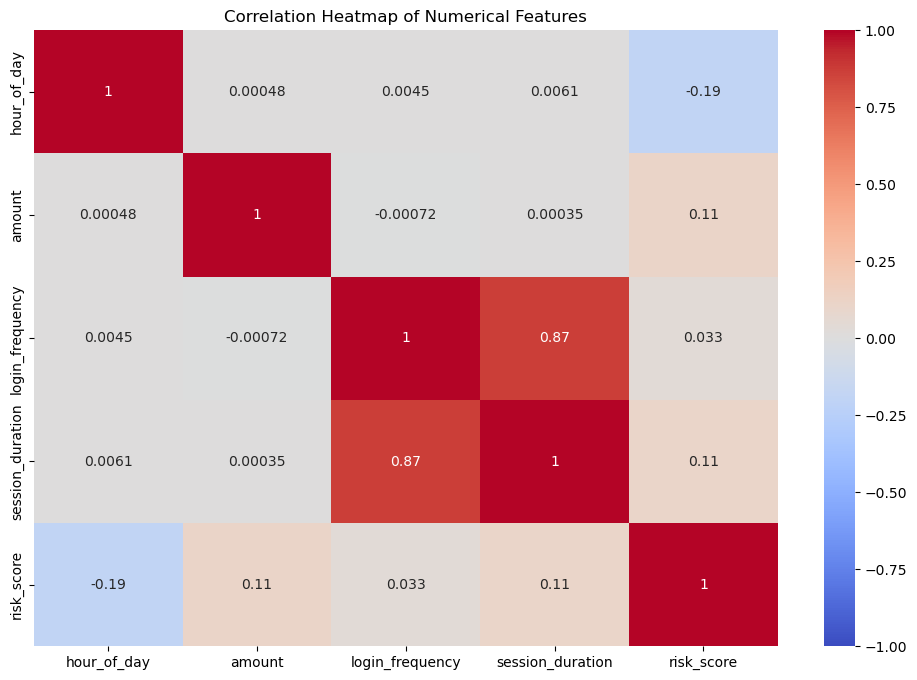

In [13]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

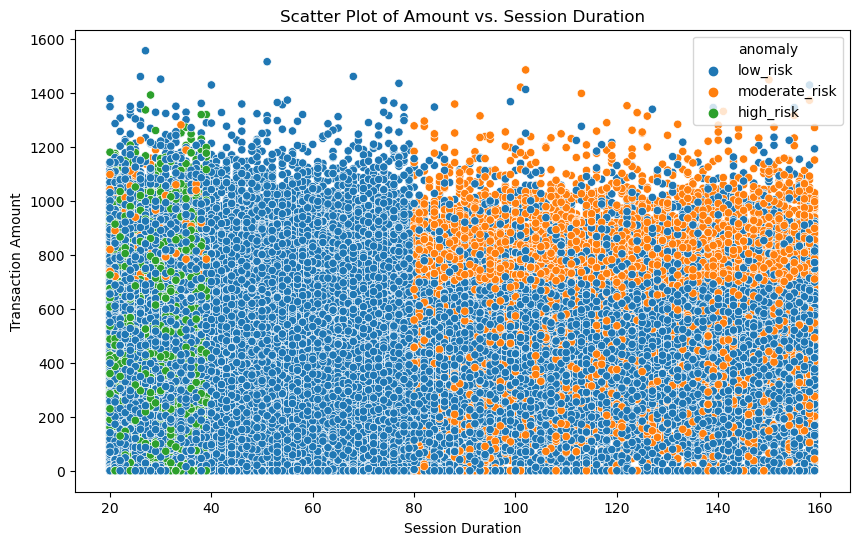

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='session_duration', y='amount', data=df, hue='anomaly')
plt.title('Scatter Plot of Amount vs. Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Transaction Amount')
plt.show()

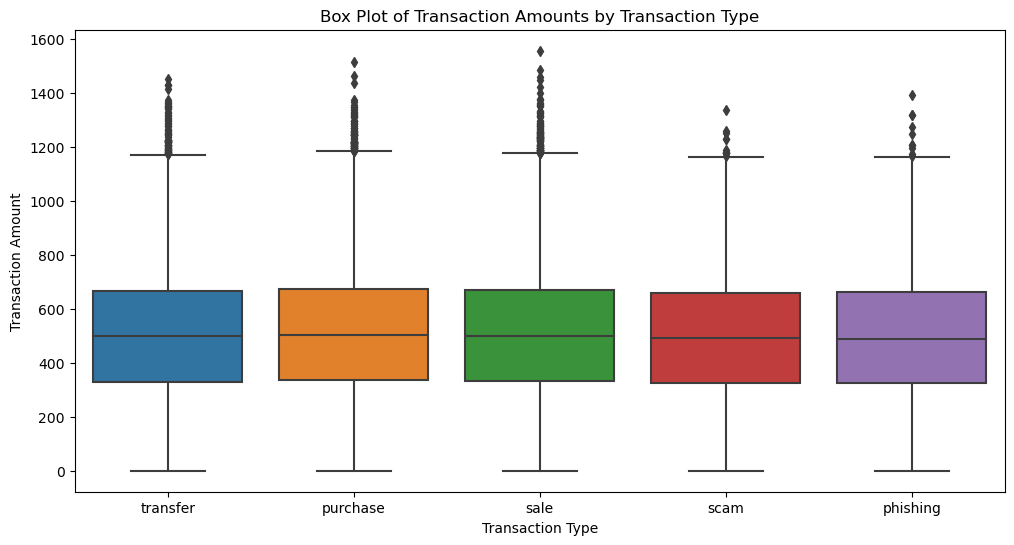

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='transaction_type', y='amount', data=df)
plt.title('Box Plot of Transaction Amounts by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

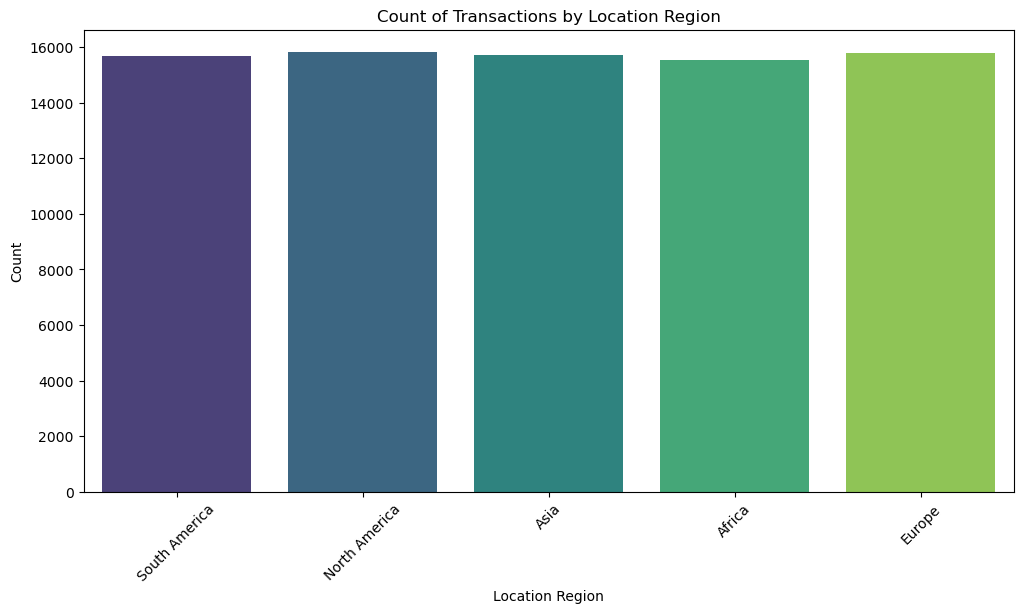

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location_region', data=df, palette='viridis')
plt.title('Count of Transactions by Location Region')
plt.xlabel('Location Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

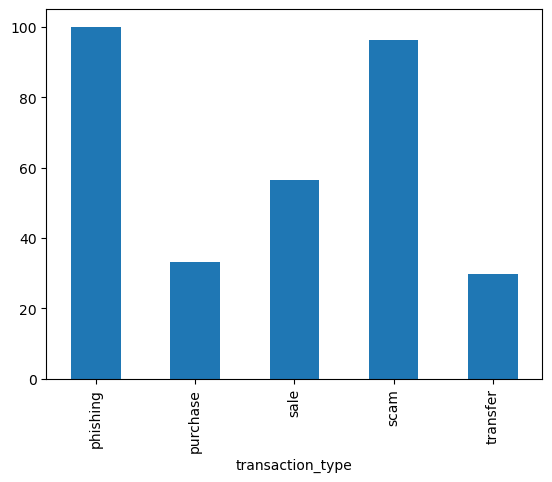

In [17]:
df.groupby('transaction_type')['risk_score'].mean().plot(kind='bar')
plt.show()

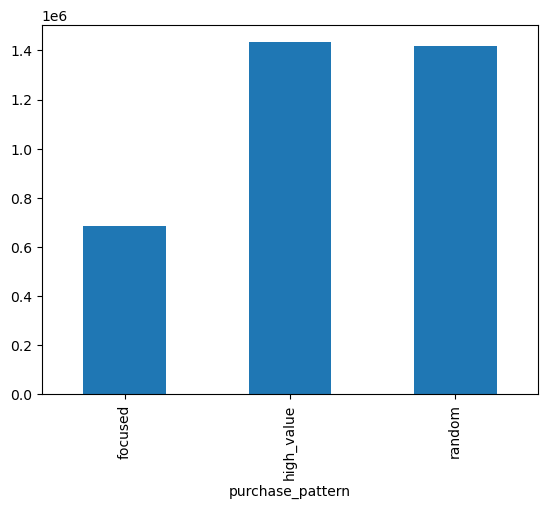

In [18]:
df.groupby('purchase_pattern')['risk_score'].sum().plot(kind='bar')
plt.show()

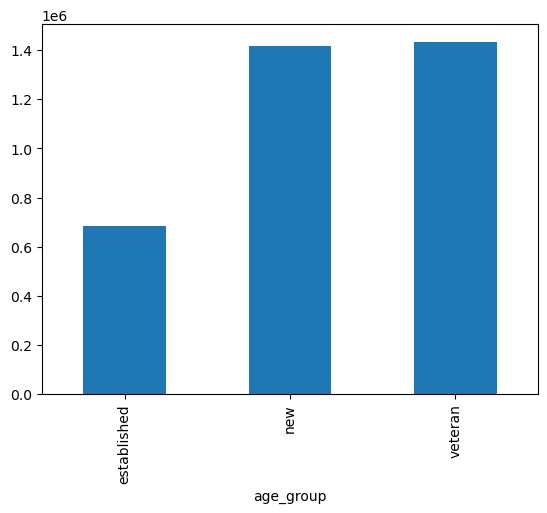

In [19]:
df.groupby('age_group')['risk_score'].sum().plot(kind='bar')
plt.show()

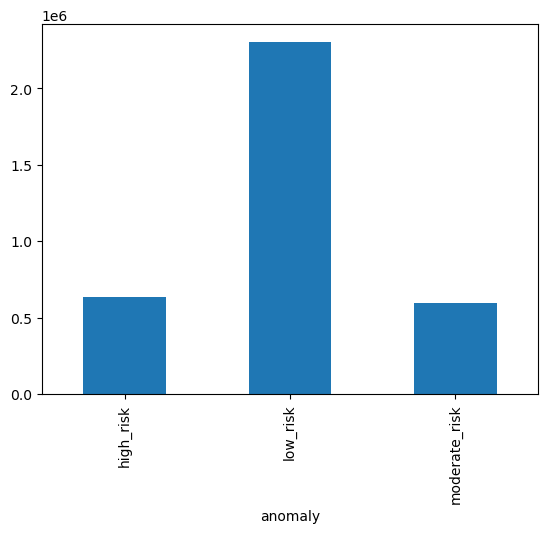

In [20]:
df.groupby('anomaly')['risk_score'].sum().plot(kind='bar')
plt.show()

In [21]:
y=df['anomaly']
x=df[['hour_of_day', 'amount', 'transaction_type','location_region', 'login_frequency', 'session_duration','purchase_pattern', 'age_group', 'risk_score']]

In [22]:
x=pd.get_dummies(x,columns=['transaction_type','location_region','purchase_pattern','age_group'],drop_first=True,dtype=int)
x.head()

,hour_of_day,amount,login_frequency,session_duration,risk_score,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,0,592.024530,6,84,49.6125,0,0,0,1,0,0,0,1,1,0,0,1
1,0,755.500717,3,70,25.3125,0,0,0,1,0,0,1,0,0,0,0,0
2,0,247.716361,5,54,20.2500,0,0,0,1,1,0,0,0,0,0,0,0
3,0,422.789709,4,62,35.4375,1,0,0,0,0,0,1,0,0,0,0,0
4,0,353.949174,7,94,70.8750,0,1,0,0,0,0,0,1,1,0,0,1


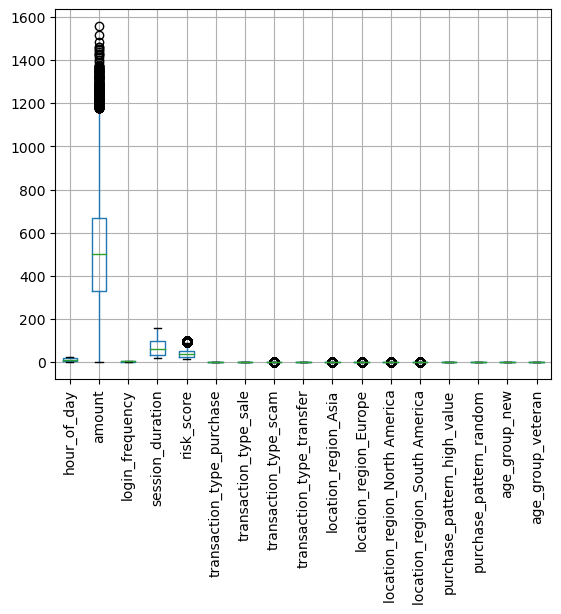

In [25]:
x.boxplot()
plt.xticks(rotation=90)
plt.show()

In [26]:
cols=[]
for i in x.columns:
    if x[i].nunique()>2:
        cols.append(i)

In [27]:
cols

['hour_of_day', 'amount', 'login_frequency', 'session_duration', 'risk_score']

In [28]:
from sklearn.preprocessing import MinMaxScaler
mmax=MinMaxScaler()

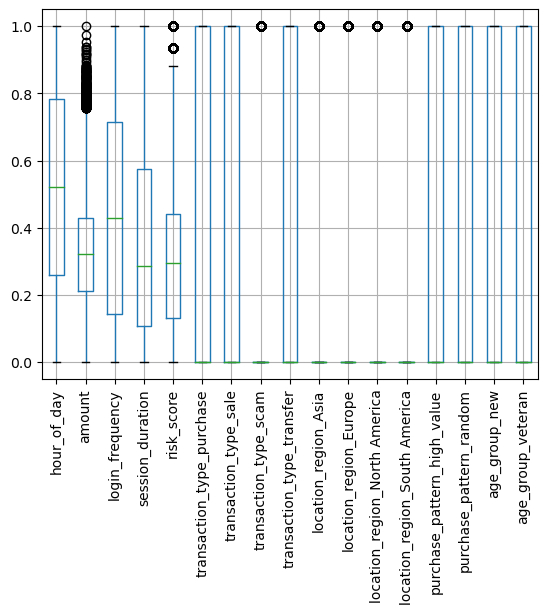

In [29]:
x[cols]=mmax.fit_transform(x[cols])
x.boxplot()
plt.xticks(rotation=90)
plt.show()

In [30]:
x.skew()

hour_of_day                     -0.005089
amount                           0.124223
login_frequency                  0.174246
session_duration                 0.660789
risk_score                       1.047827
transaction_type_purchase        0.785089
transaction_type_sale            0.778790
transaction_type_scam            4.117927
transaction_type_transfer        0.971774
location_region_Asia             1.498936
location_region_Europe           1.491408
location_region_North America    1.488152
location_region_South America    1.505107
purchase_pattern_high_value      0.693682
purchase_pattern_random          0.710463
age_group_new                    0.710463
age_group_veteran                0.693682
dtype: float64

In [31]:
x

,hour_of_day,amount,login_frequency,session_duration,risk_score,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,0.0,0.380193,0.714286,0.460432,0.407206,0,0,0,1,0,0,0,1,1,0,0,1
1,0.0,0.485178,0.285714,0.359712,0.121324,0,0,0,1,0,0,1,0,0,0,0,0
2,0.0,0.159078,0.571429,0.244604,0.061765,0,0,0,1,1,0,0,0,0,0,0,0
3,0.0,0.271510,0.428571,0.302158,0.240441,1,0,0,0,0,0,1,0,0,0,0,0
4,0.0,0.227301,0.857143,0.532374,0.657353,0,1,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,1.0,0.154116,0.000000,0.079137,0.117647,0,0,0,1,0,0,0,1,0,1,1,0
78596,1.0,0.268977,0.714286,0.856115,0.255882,0,0,0,1,0,0,1,0,1,0,0,1
78597,1.0,0.251246,1.000000,0.489209,0.255882,0,0,0,1,0,1,0,0,1,0,0,1
78598,1.0,0.348699,0.857143,0.661871,0.441176,0,1,0,0,0,0,0,0,1,0,0,1


In [32]:
y.unique()

array(['low_risk', 'moderate_risk', 'high_risk'], dtype=object)

In [33]:
y=y.replace({'low_risk':0,'moderate_risk':1,'high_risk':0})

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
lr=LogisticRegression(multi_class='multinomial')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
 
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [37]:
lr_model = lr.fit(xtrain,ytrain)
lr_model

C:\Users\shivateja beecharaju\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [38]:
lr_model.intercept_

array([-23.58029623])

In [39]:
lr_model.coef_

array([[-1.18741368e+00,  4.39396182e+00,  1.46149949e-01,
         2.18393441e-02,  2.05606797e+01,  3.34141757e-03,
         1.09080886e+01, -1.20036736e+00,  3.15650515e-03,
        -2.23565865e-02, -5.23504184e-03, -5.42456331e-03,
        -1.36284559e-02,  4.82820876e-01, -4.83786819e-01,
        -4.83786819e-01,  4.82820876e-01]])

In [40]:
coef=[]
for i in lr_model.coef_:
    for j in i:
        coef.append(j)

In [41]:
len(xtrain.columns),len(coef)

(17, 17)

In [42]:
coefficent=pd.DataFrame({'features':xtrain.columns,'coefficients':coef})

In [43]:
y_pred=lr_model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
accuracy_score(ytest,y_pred)

1.0

In [45]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [46]:
y_pred=dt_model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
accuracy_score(ytest,y_pred)

1.0

In [48]:
rf_model=rf.fit(xtrain,ytrain)
rf_model

RandomForestClassifier()

In [49]:
y_pred=rf_model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
accuracy_score(ytest,y_pred)

1.0

In [57]:
gnb_model=gnb.fit(xtrain,ytrain)
gnb_model

GaussianNB()

In [58]:
y_pred=gnb_model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
accuracy_score(ytest,y_pred)

0.8666666666666667

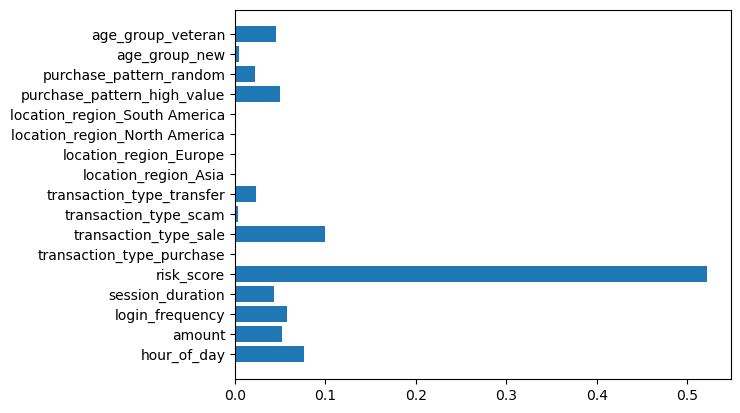

In [60]:
plt.barh(xtrain.columns,rf_model.feature_importances_)
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(xtrain, ytrain)

# Make predictions
y_pred = model.predict(xtest)

# Evaluation
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[ 1997     0     0]
 [    0 18990     0]
 [    0     0  2593]]
Classification Report:
                precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1997
     low_risk       1.00      1.00      1.00     18990
moderate_risk       1.00      1.00      1.00      2593

     accuracy                           1.00     23580
    macro avg       1.00      1.00      1.00     23580
 weighted avg       1.00      1.00      1.00     23580



In [67]:
model = GaussianNB()
model.fit(xtrain, ytrain)

# Make predictions
y_pred = model.predict(xtest)

# Evaluation
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Accuracy: 0.8666666666666667
Confusion Matrix:
 [[ 1997     0     0]
 [    0 15975  3015]
 [    0   129  2464]]
Classification Report:
                precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1997
     low_risk       0.99      0.84      0.91     18990
moderate_risk       0.45      0.95      0.61      2593

     accuracy                           0.87     23580
    macro avg       0.81      0.93      0.84     23580
 weighted avg       0.93      0.87      0.89     23580



In [68]:
model = DecisionTreeClassifier(random_state=42)
model.fit(xtrain, ytrain)

# Make predictions
y_pred = model.predict(xtest)

# Evaluation
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[ 1997     0     0]
 [    0 18990     0]
 [    0     0  2593]]
Classification Report:
                precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1997
     low_risk       1.00      1.00      1.00     18990
moderate_risk       1.00      1.00      1.00      2593

     accuracy                           1.00     23580
    macro avg       1.00      1.00      1.00     23580
 weighted avg       1.00      1.00      1.00     23580



In [69]:
model = LogisticRegression(random_state=42)
model.fit(xtrain, ytrain)

# Make predictions
y_pred = model.predict(xtest)

# Evaluation
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

C:\Users\shivateja beecharaju\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Confusion Matrix:
 [[ 1997     0     0]
 [    0 18990     0]
 [    0     0  2593]]
Classification Report:
                precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1997
     low_risk       1.00      1.00      1.00     18990
moderate_risk       1.00      1.00      1.00      2593

     accuracy                           1.00     23580
    macro avg       1.00      1.00      1.00     23580
 weighted avg       1.00      1.00      1.00     23580



In [70]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  # Example model
import numpy as np

# Assuming x and y are already defined as features and target
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize your model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation: {np.std(cv_scores)}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


In [71]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  # Example model
import numpy as np

# Assuming x and y are already defined as features and target
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize your model (e.g., RandomForestClassifier)
model = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation: {np.std(cv_scores)}")

Cross-validation scores: [0.86647583 0.86628499 0.86354962 0.86240458 0.85846056]
Mean accuracy: 0.8634351145038167
Standard deviation: 0.0029390139111352335


In [73]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  # Example model
import numpy as np

# Assuming x and y are already defined as features and target
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize your model (e.g., RandomForestClassifier)
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation: {np.std(cv_scores)}")

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


In [74]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  # Example model
import numpy as np

# Assuming x and y are already defined as features and target
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize your model (e.g., RandomForestClassifier)
model = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation: {np.std(cv_scores)}")

C:\Users\shivateja beecharaju\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shivateja beecharaju\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


C:\Users\shivateja beecharaju\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
